In [1]:
import numpy as np
import cv2
import math
import matplotlib.pyplot as plt # 주피터 환경에서 이미지 열어주는거
import statistics

def task1(src_img_path, clean_img_path, dst_img_path):
    """
    This is main function for task 1.
    It takes 3 arguments,
    'src_img_path' is path for source image.
    'clean_img_path' is path for clean image.
    'dst_img_path' is path for output image, where your result image should be saved.

    You should load image in 'src_img_path', and then perform task 1 of your assignment 1,
    and then save your result image to 'dst_img_path'.
    
    find out what is optimal filter and kernel_size for this image
    """
    noisy_img = cv2.imread(src_img_path)
    clean_img = cv2.imread(clean_img_path)
    result_img = None

    # do noise removal
    

    cv2.imwrite(dst_img_path, result_img)
    pass


def apply_average_filter(img, kernel_size):  # kernel_size 3 means 3x3 matrix.
    """
    You should implement average filter convolution algorithm in this function.
    It takes 2 arguments,

    'img' is source image, and you should perform convolution with average filter.

    'kernel_size' is a int value, which determines kernel size of average filter.

    You should return result image.
    """

    k = int(kernel_size/2)

    new_img = np.zeros([img.shape[0], img.shape[1],
                        img.shape[2]], dtype='uint8')

    # add more zeros to each edges
    apply_img = np.zeros(
        [img.shape[0]+2*k, img.shape[1]+2*k, img.shape[2]], dtype='uint8')
    apply_img[k:img.shape[0]+k, k:img.shape[1]+k] = img

    mask = np.ones([3, 3, 3], dtype=int)
    mask = mask/9

    temp = []  # temp는 한 픽셀당 rgb값의 리스트이다. ex. [143,52,211]

    for i in range(k, len(img)-k):
        for j in range(k, len(img[0])-k):
            t = [0, 0, 0]
            for row in range(kernel_size):
                for col in range(kernel_size):
                    t += img[i-k+row, j-k+col]  # * mask[row,col]

            new_img[i, j] = t/kernel_size**2
    return new_img


"""
    for i in range(k, len(apply_img)-k):
        for j in range(k, len(apply_img[0])-k):
            t = [0, 0, 0]
            for row in range(kernel_size):
                for col in range(kernel_size):
                    t += apply_img[i-k+row, j-k+col]  # * mask[row,col]

            new_img[i-k, j-k] = t/(kernel_size*kernel_size)
"""


def apply_median_filter(img, kernel_size):
    """
    You should implement median filter convolution algorithm in this function.
    It takes 2 arguments,
    'img' is source image, and you should perform convolution with median filter.
    'kernel_size' is a int value, which determines kernel size of median filter.

    You should return result image.

    """

    k = int(kernel_size/2)

    new_img = np.zeros([img.shape[0], img.shape[1],
                        img.shape[2]], dtype='uint8')

    mask = np.ones([3, 3], dtype=int)
    mask = mask/9

    temp = []  # temp는 한 픽셀당 rgb값의 리스트이다. ex. [143,52,211]

    def mid_of(color):
        return sorted(color)[int(kernel_size*kernel_size/2)]

    for i in range(1, len(img)-k):
        for j in range(1, len(img[0])-k):
            red, green, blue = [], [], []
            for row in range(kernel_size):
                for col in range(kernel_size):
                    t = img[i-k+row, j-k+col]
                    red.append(t[0])
                    green.append(t[1])
                    blue.append(t[2])

            new_img[i, j] = [mid_of(red), mid_of(green), mid_of(blue)]

            ###
    return new_img

def apply_bilateral_filter(img, kernel_size, sigma_s, sigma_r):
    """
    You should implement convolution with additional filter.
    You can use any filters for this function, except average, median filter.
    It takes at least 2 arguments,
    'img' is source image, and you should perform convolution with median filter.
    'kernel_size' is a int value, which determines kernel size of average filter.

    'sigma_s' is a int value, which is a sigma value for G_s
    'sigma_r' is a int value, which is a sigma value for G_r

    You can add more arguments for this function if you need.

    You should return result image.
    """

    filtered_image = img.copy()

    k = int(kernel_size/2)

    a, b, c = img.shape

    border_add_img = np.zeros([a+2*k, b+2*k, c], dtype='uint8')
    border_add_img[k:a+k, k:b+k] = img.copy()

    for i in range(k, len(img)):
        for j in range(k, len(img[0])):
            abf(img, filtered_image, i, j, kernel_size, sigma_r, sigma_s, 0)
            abf(img, filtered_image, i,
                j, kernel_size, sigma_r, sigma_s, 1)
            abf(img, filtered_image, i,
                j, kernel_size, sigma_r, sigma_s, 2)

    return filtered_image

In [2]:

def distance(x, y, i, j):
    return np.sqrt((x-i)**2 + (y-j)**2)


def gaussian(x, sigma):
    return (1.0 / (2 * math.pi * (sigma ** 2))) * math.exp(- (int(x) ** 2) / (2 * sigma ** 2))


def abf(source, filtered_image, x, y, diameter, sigma_i, sigma_s, color):
    i_filtered = 0
    Wp = 0

    k = int(diameter/2)

    for row in range(diameter):
        for col in range(diameter):
            neighbour_x = x - k + row
            neighbour_y = y - k + col
            if neighbour_x >= len(source):
                neighbour_x -= len(source)
            if neighbour_y >= len(source[0]):
                neighbour_y -= len(source[0])

            gi = gaussian(source[neighbour_x][neighbour_y]
                          [color] - source[x][y][color], sigma_i)
            gs = gaussian(distance(neighbour_x, neighbour_y, x, y), sigma_s)
            w = gi * gs  # 최종 bilateral

            i_filtered += source[neighbour_x][neighbour_y][color] * w
            Wp += w

    i_filtered = i_filtered / Wp  # normalize?
    filtered_image[x][y][color] = int(round(i_filtered))


"""
#      sigma_i = int(sigma_i)
    while i < diameter:
        j = 0
        while j < diameter:
            neighbour_x = x - (k - i)
            neighbour_y = y - (k - j)
            if neighbour_x >= len(border_add_img):
                neighbour_x -= len(border_add_img)
            if neighbour_y >= len(border_add_img[0]):
                neighbour_y -= len(border_add_img[0])

            gi = gaussian(border_add_img[neighbour_x][neighbour_y]
                          [color] - border_add_img[x][y][color], sigma_i)
            gs = gaussian(distance(neighbour_x, neighbour_y, x, y), sigma_s)
            w = gi * gs  # 최종 bilateral
            i_filtered += border_add_img[neighbour_x][neighbour_y][color] * w
            Wp += w
            j += 1
        i += 1
    i_filtered = i_filtered / Wp  # normalize?
    filtered_image[x][y][color] = int(round(i_filtered))
"""


'\n#      sigma_i = int(sigma_i)\n    while i < diameter:\n        j = 0\n        while j < diameter:\n            neighbour_x = x - (k - i)\n            neighbour_y = y - (k - j)\n            if neighbour_x >= len(border_add_img):\n                neighbour_x -= len(border_add_img)\n            if neighbour_y >= len(border_add_img[0]):\n                neighbour_y -= len(border_add_img[0])\n\n            gi = gaussian(border_add_img[neighbour_x][neighbour_y]\n                          [color] - border_add_img[x][y][color], sigma_i)\n            gs = gaussian(distance(neighbour_x, neighbour_y, x, y), sigma_s)\n            w = gi * gs  # 최종 bilateral\n            i_filtered += border_add_img[neighbour_x][neighbour_y][color] * w\n            Wp += w\n            j += 1\n        i += 1\n    i_filtered = i_filtered / Wp  # normalize?\n    filtered_image[x][y][color] = int(round(i_filtered))\n'

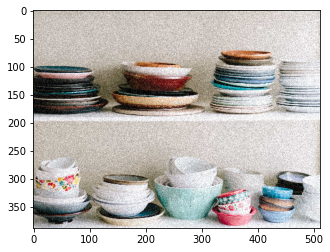

NameError: name 'bilateral_filter_own' is not defined

In [3]:
import math

img = cv2.imread('../inputs/test2.png', cv2.IMREAD_COLOR)
img2 = cv2.imread('../inputs/test2_clean.png', cv2.IMREAD_COLOR)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

result_img1 = bilateral_filter_own(img, 3, 12.0, 16.0)
result_img2 = apply_median_filter(img,3)

plt.imshow(cv2.cvtColor(result_img1, cv2.COLOR_BGR2RGB))
plt.show()

plt.imshow(cv2.cvtColor(result_img2, cv2.COLOR_BGR2RGB))
plt.show()

plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
plt.show()


In [4]:
apply_img = np.ones([img.shape[0]+2*2, img.shape[1]+2*2, img.shape[2]], dtype='uint8')*100
print(apply_img)

[[[100 100 100]
  [100 100 100]
  [100 100 100]
  ...
  [100 100 100]
  [100 100 100]
  [100 100 100]]

 [[100 100 100]
  [100 100 100]
  [100 100 100]
  ...
  [100 100 100]
  [100 100 100]
  [100 100 100]]

 [[100 100 100]
  [100 100 100]
  [100 100 100]
  ...
  [100 100 100]
  [100 100 100]
  [100 100 100]]

 ...

 [[100 100 100]
  [100 100 100]
  [100 100 100]
  ...
  [100 100 100]
  [100 100 100]
  [100 100 100]]

 [[100 100 100]
  [100 100 100]
  [100 100 100]
  ...
  [100 100 100]
  [100 100 100]
  [100 100 100]]

 [[100 100 100]
  [100 100 100]
  [100 100 100]
  ...
  [100 100 100]
  [100 100 100]
  [100 100 100]]]


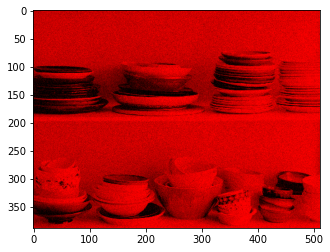

In [7]:

img = cv2.imread('../inputs/test2.png', cv2.IMREAD_COLOR)
img2 = cv2.imread('../inputs/test2_clean.png', cv2.IMREAD_COLOR)

for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        img[i][j][0] = 0
        img[i][j][1] = 0


plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()
        